In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Credit Card data

CCData = pd.read_csv(r"E:\00 Datasets\CCdata\creditcard.csv", header=0)

# Copy to back-up file

CCData_bk = CCData.copy()

# Display first 5 values

CCData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Display the shape of file

CCData.shape

(284807, 31)

In [4]:
# Seperate as 2 dataset based on the target variable class

Q1 = psql.sqldf("select * from CCData where Class = 1 ")
Q2 = psql.sqldf("select * from CCData where Class = 0 ")

In [5]:
# Random sample the data as 20% from "Major Class"

Q3 = Q2.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.025))

In [6]:
# Combine the 'minor class' and 20% of 'major class' data as new file 

CCDataN = Q1._append(Q3, ignore_index=True)

# Display the shape of the file

CCDataN.shape

(7600, 31)

In [7]:
# Display the Credit Card data information

CCDataN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7600 non-null   float64
 1   V1      7600 non-null   float64
 2   V2      7600 non-null   float64
 3   V3      7600 non-null   float64
 4   V4      7600 non-null   float64
 5   V5      7600 non-null   float64
 6   V6      7600 non-null   float64
 7   V7      7600 non-null   float64
 8   V8      7600 non-null   float64
 9   V9      7600 non-null   float64
 10  V10     7600 non-null   float64
 11  V11     7600 non-null   float64
 12  V12     7600 non-null   float64
 13  V13     7600 non-null   float64
 14  V14     7600 non-null   float64
 15  V15     7600 non-null   float64
 16  V16     7600 non-null   float64
 17  V17     7600 non-null   float64
 18  V18     7600 non-null   float64
 19  V19     7600 non-null   float64
 20  V20     7600 non-null   float64
 21  V21     7600 non-null   float64
 22  

In [8]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)

CreditCard_count = CCDataN.Class.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total CC Trans:', len(CCDataN))

Class 0: 7108
Class 1: 492
Proportion: 14.45 : 1
Total CC Trans: 7600


In [9]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)

CreditCard_count = CCData.Class.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total CC Trans:', len(CCData))

Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1
Total CC Trans: 284807


In [10]:
# Delect variable which are influencing the target variable

del CCDataN['Time']

# Display first 5 records

CCDataN.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [11]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in CCDataN.columns:
    if col != 'Class':
        IndepVar.append(col)

TargetVar = 'Class'

x = CCDataN[IndepVar]
y = CCDataN[TargetVar]

In [12]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(7996, 29)
(7996,)


In [13]:
# Merge two Dataframes x_over, y_over on index of both the dataframes to get file

CCDataN2 = x_over.merge(y_over, left_index=True, right_index=True)

CCDataN2.shape

(7996, 30)

In [14]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)
# After over sample technique applied

CreditCard_count = CCDataN2.Class.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total CC Trans:', len(CCDataN2))

Class 0: 7108
Class 1: 888
Proportion: 8.0 : 1
Total CC Trans: 7996


In [15]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5597, 29), (2399, 29), (5597,), (2399,))

In [16]:
# Use Standardization to remove the mean and scale to unit variance

from sklearn.preprocessing import StandardScaler

SScaler = StandardScaler()

x_train['Amount'] = SScaler.fit_transform(x_train['Amount'].values.reshape(-1, 1))
x_test['Amount'] = SScaler.fit_transform(x_test['Amount'].values.reshape(-1, 1))

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [17]:
# Load the Results dataset

CSResults = pd.read_csv(r"E:\00 Henotic\SRKR\Datasets\HTResults.csv", header=0)

CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Compare Algorithms with 12.5% of Over Sampling

Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 244   38]
 [  10 2107]]
Outcome values : 
 244 38 10 2107
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.87      0.91       282
           0       0.98      1.00      0.99      2117

    accuracy                           0.98      2399
   macro avg       0.97      0.93      0.95      2399
weighted avg       0.98      0.98      0.98      2399

Accuracy : 98.0 %
Precision : 96.1 %
Recall : 86.5 %
F1 Score : 0.91
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 93.0 %
MCC : 0.901
roc_auc_score: 0.93


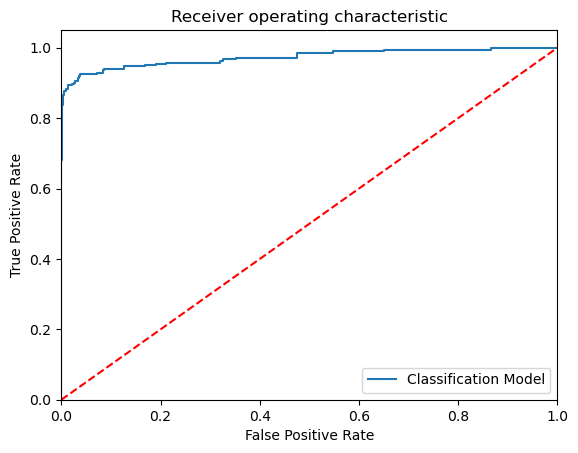

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 271   11]
 [  27 2090]]
Outcome values : 
 271 11 27 2090
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.96      0.93       282
           0       0.99      0.99      0.99      2117

    accuracy                           0.98      2399
   macro avg       0.95      0.97      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Accuracy : 98.4 %
Precision : 90.9 %
Recall : 96.1 %
F1 Score : 0.934
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 97.4 %
MCC : 0.926
roc_auc_score: 0.974


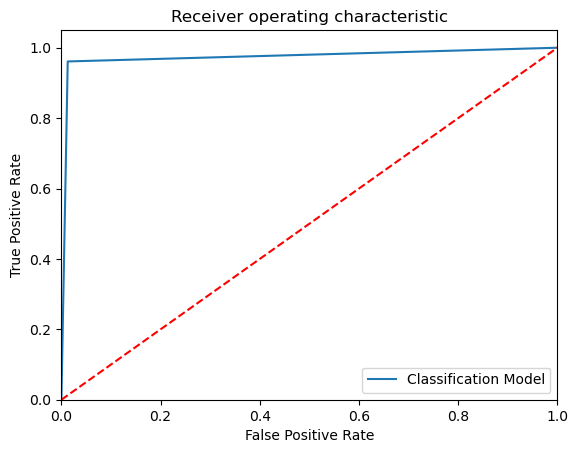

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 272   10]
 [   4 2113]]
Outcome values : 
 272 10 4 2113
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.97       282
           0       1.00      1.00      1.00      2117

    accuracy                           0.99      2399
   macro avg       0.99      0.98      0.99      2399
weighted avg       0.99      0.99      0.99      2399

Accuracy : 99.4 %
Precision : 98.6 %
Recall : 96.5 %
F1 Score : 0.975
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 98.2 %
MCC : 0.972
roc_auc_score: 0.981


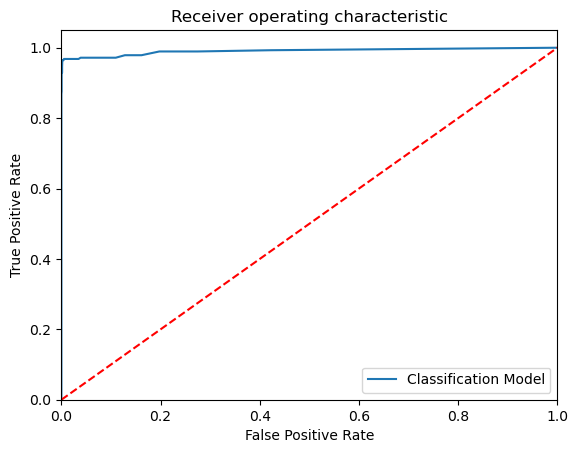

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 272   10]
 [   4 2113]]
Outcome values : 
 272 10 4 2113
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.97       282
           0       1.00      1.00      1.00      2117

    accuracy                           0.99      2399
   macro avg       0.99      0.98      0.99      2399
weighted avg       0.99      0.99      0.99      2399

Accuracy : 99.4 %
Precision : 98.6 %
Recall : 96.5 %
F1 Score : 0.975
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 98.2 %
MCC : 0.972
roc_auc_score: 0.981


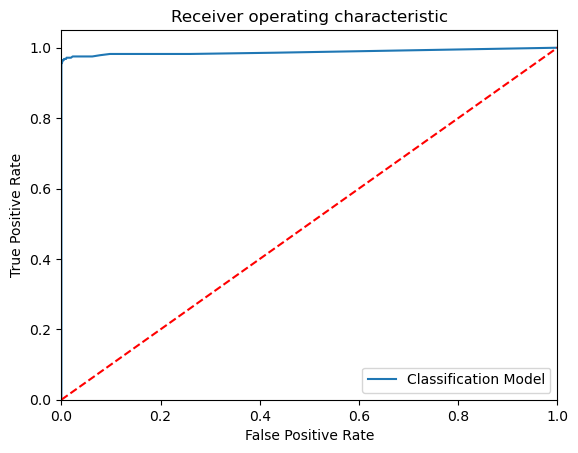

-----------------------------------------------------------------------------------------------------


In [18]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults._append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [19]:
CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),244,38,10,2107,0.980,0.961,0.865,0.910,0.995,0.901,0.930262,0.930
1,DecisionTreeClassifier(),271,11,27,2090,0.984,0.909,0.961,0.934,0.987,0.926,0.974120,0.974
2,"(DecisionTreeClassifier(max_features='sqrt', r...",272,10,4,2113,0.994,0.986,0.965,0.975,0.998,0.972,0.981325,0.982
3,"(ExtraTreeClassifier(random_state=415410522), ...",272,10,4,2113,0.994,0.986,0.965,0.975,0.998,0.972,0.981325,0.982


# Compare Classification Algorithms - Over Sampling 

In [20]:
# Random Over Sampling can be implemented by using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

x_over1, y_over1 = oversample.fit_resample(x, y)

print(x_over1.shape)
print(y_over1.shape)

(14216, 29)
(14216,)


In [21]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

xo_train, xo_test, yo_train, yo_test = train_test_split(x_over1, y_over1, test_size = 0.30, random_state = 42)

# Display the shape 

xo_train.shape, xo_test.shape, yo_train.shape, yo_test.shape

((9951, 29), (4265, 29), (9951,), (4265,))

In [22]:
# Use Standardization to remove the mean and scale to unit variance

from sklearn.preprocessing import StandardScaler

SScaler = StandardScaler()

xo_train['Amount'] = SScaler.fit_transform(xo_train['Amount'].values.reshape(-1, 1))
xo_test['Amount'] = SScaler.fit_transform(xo_test['Amount'].values.reshape(-1, 1))

xo_train = pd.DataFrame(xo_train)
xo_test = pd.DataFrame(xo_test)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[1966  163]
 [  50 2086]]
Outcome values : 
 1966 163 50 2086
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.92      0.95      2129
           0       0.93      0.98      0.95      2136

    accuracy                           0.95      4265
   macro avg       0.95      0.95      0.95      4265
weighted avg       0.95      0.95      0.95      4265

Accuracy : 95.0 %
Precision : 97.5 %
Recall : 92.3 %
F1 Score : 0.949
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 95.0 %
roc_auc_score: 0.95


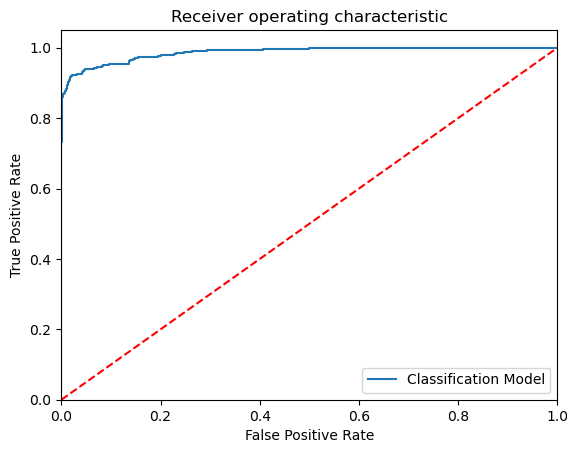

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[2129    0]
 [  32 2104]]
Outcome values : 
 2129 0 32 2104
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      2129
           0       1.00      0.99      0.99      2136

    accuracy                           0.99      4265
   macro avg       0.99      0.99      0.99      4265
weighted avg       0.99      0.99      0.99      4265

Accuracy : 99.2 %
Precision : 98.5 %
Recall : 100.0 %
F1 Score : 0.993
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 99.2 %
roc_auc_score: 0.993


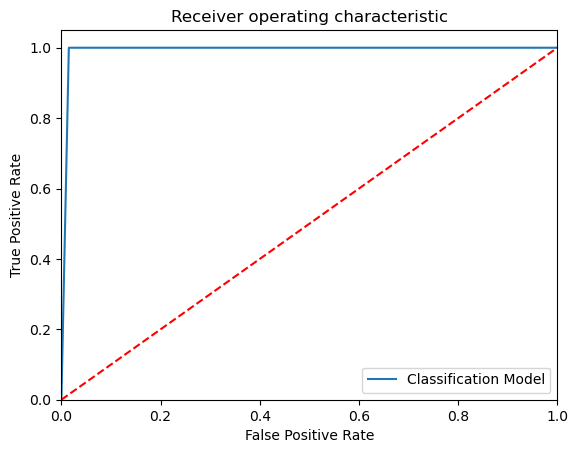

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[2129    0]
 [   1 2135]]
Outcome values : 
 2129 0 1 2135
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2129
           0       1.00      1.00      1.00      2136

    accuracy                           1.00      4265
   macro avg       1.00      1.00      1.00      4265
weighted avg       1.00      1.00      1.00      4265

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


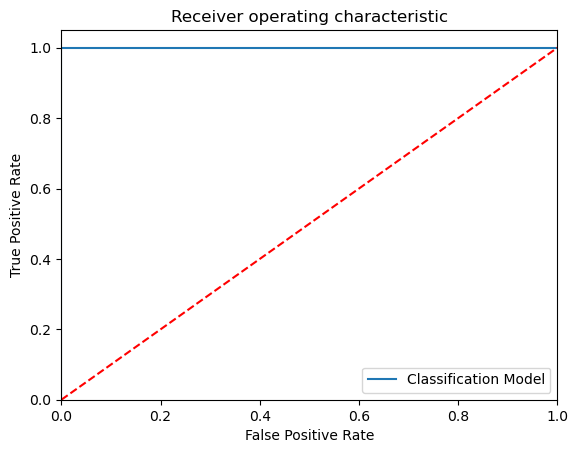

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[2129    0]
 [   2 2134]]
Outcome values : 
 2129 0 2 2134
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2129
           0       1.00      1.00      1.00      2136

    accuracy                           1.00      4265
   macro avg       1.00      1.00      1.00      4265
weighted avg       1.00      1.00      1.00      4265

Accuracy : 100.0 %
Precision : 99.9 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


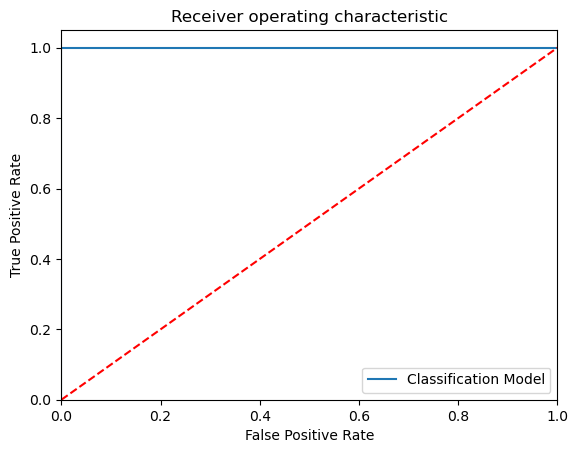

-----------------------------------------------------------------------------------------------------


In [23]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
    
    # Assign values
    
    x_train = xo_train
    x_test = xo_test
    y_train = yo_train
    y_test = yo_test
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults._append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [24]:
CSResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),244,38,10,2107,0.980,0.961,0.865,0.910,0.995,0.901,0.930262,0.930
1,DecisionTreeClassifier(),271,11,27,2090,0.984,0.909,0.961,0.934,0.987,0.926,0.974120,0.974
2,"(DecisionTreeClassifier(max_features='sqrt', r...",272,10,4,2113,0.994,0.986,0.965,0.975,0.998,0.972,0.981325,0.982
3,"(ExtraTreeClassifier(random_state=415410522), ...",272,10,4,2113,0.994,0.986,0.965,0.975,0.998,0.972,0.981325,0.982
4,LogisticRegression(),1966,163,50,2086,0.950,0.975,0.923,0.949,0.977,MCC,0.950015,0.950
5,DecisionTreeClassifier(),2129,0,32,2104,0.992,0.985,1.000,0.993,0.985,MCC,0.992509,0.992
6,"(DecisionTreeClassifier(max_features='sqrt', r...",2129,0,1,2135,1.000,1.000,1.000,1.000,1.000,MCC,0.999766,1.000
7,"(ExtraTreeClassifier(random_state=1511427405),...",2129,0,2,2134,1.000,0.999,1.000,1.000,0.999,MCC,0.999532,1.000
